In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
paris_data = pd.read_csv("Data/full_paris_emolex.csv")

In [4]:
emotions = ["positive", "negative", "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

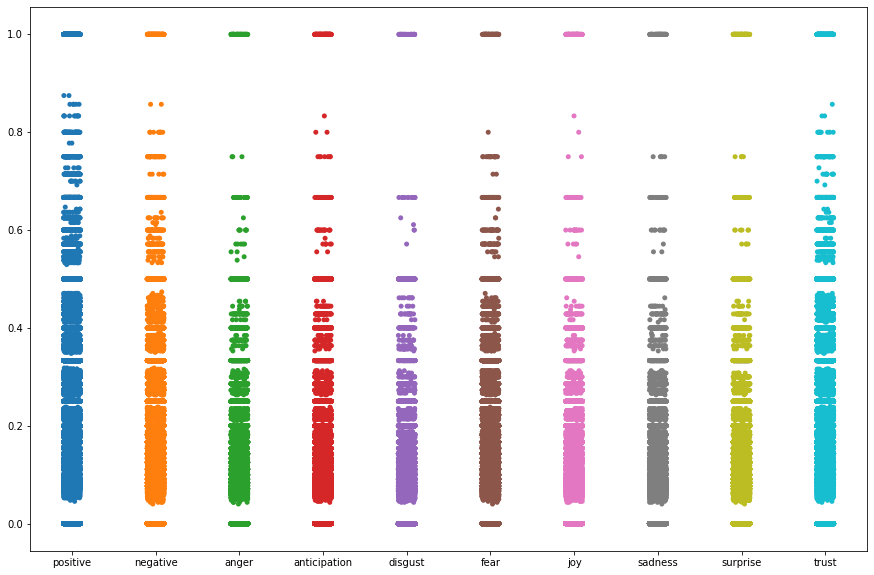

In [5]:
plt.figure(figsize=(15,10))
sns.stripplot(data = paris_data[emotions])
plt.show()

In [ ]:
#Add bar chart of averages

In [6]:
vec = TfidfVectorizer(norm='l1', max_features = 10000) #best way to do this?
matrix = matrix = vec.fit_transform(paris_data['full_text'])
vocab = vec.get_feature_names()

In [7]:
vocab_df = pd.DataFrame(matrix.toarray(), columns=vocab)
vocab_df.head()

,00,000,04,05,06,08,09,0n2geflmhd,10,100,...,être,último,über,œuvre,για,на,по,पर,கள,லந
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def get_topics(df, vocab_df, topic, name):
    df[name] = vocab_df[topic].sum(axis = 1)
    df[name] = df[name].apply(lambda x: 1 if x > 0 else 0)
    return df[name].sum()

In [20]:
paris_topic_1 = ["trump", "policy", "lead","people", "know","withdraw", "deal", "pull", "sign", "time"]
paris_topic_2 = ["energy", "environment", "party", "oneplanetsummit", "finance", "renewable", "adaptation"]
paris_topic_3 = ["commitment", "today", "leadership", "tackle", "challenge", "ensure", "sustainable", "investor"]
paris_topic_4 = ["impact", "news", "adapt", "life", "ability", "adverse", "administration", "environmental", "health", "private", "food", "tech"]
paris_topic_5 = ["talk", "reduce", "commit", "gas", "cut", "pledge", "greenhouse", "progress", "adopt", "message", "initiative", "reduction"]
paris_topic_6 = ["fuel", "fossil", "withdrawal", "avoid", "discuss", "face", "rule", "speak", "funding", "society", "generation", "listen", "promise", "humanity"]
paris_topic_7 = ["temperature", "limit", "warm", "record", "sea", "century", "extreme", "home"]
paris_topic_8 = ["new", "makeourplanetgreatagain", "find", "major", "fund", "develop", "technology", "sector", "poor", "benefit", "raise", "research"]
paris_topic_9 = ["cop23", "man", "tweet", "american", "disaster", "ice", "hot", "fake", "truth", "million", "blog", "die", "cold", "spend"]
paris_topic_10 = ["auspol", "kill", "ecosystem", "ratify", "pact", "dead", "era", "breach", "urgent", "adoption", "folk"]

In [21]:
topics = [paris_topic_1, paris_topic_2,paris_topic_3,paris_topic_4,paris_topic_5,paris_topic_6,paris_topic_7,paris_topic_8,paris_topic_9,paris_topic_10]
for idx, topic in zip(range(len(topics)), topics):
    name = "topic"+str(idx+1)
    count = get_topics(paris_data, vocab_df, topic, name)
    print(name, count)

topic1 17524
topic2 8429
topic3 5476
topic4 7801
topic5 5749
topic6 4707
topic7 3281
topic8 6295
topic9 5475
topic10 3231


In [22]:
topic_cols = ["topic1", "topic2","topic3","topic4","topic5","topic6","topic7","topic8","topic9","topic10"]

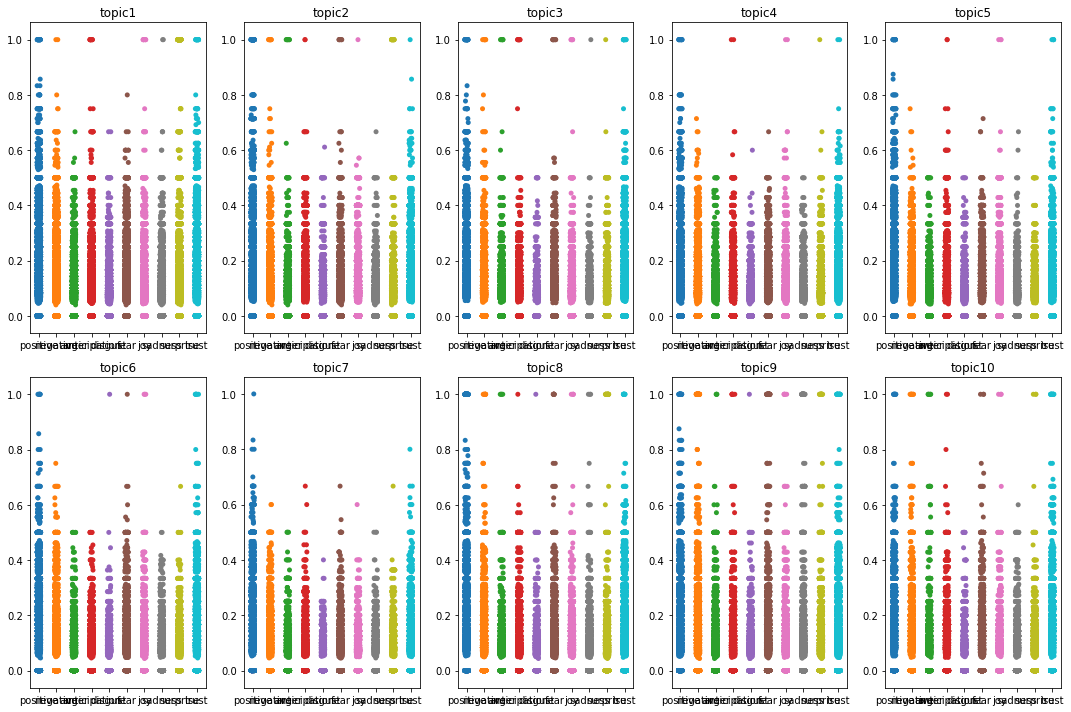

In [26]:
fig, ax = plt.subplots(2,5, figsize=(15,10))
row = 0
col = 0

for topic in topic_cols:
    df_temp = paris_data[paris_data[topic] == 1]
    sns.stripplot(data = df_temp[emotions], ax = ax[row][col])
    ax[row][col].set_title(str(topic))
    if col < 5:
        col += 1
    if col == 5:
        col = 0
        row = 1 
plt.tight_layout()
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

#### Basic Analysis with Sklearn

In [37]:
linear_regression_analysis = {}
for topic in topic_cols:
    df_temp = paris_data[paris_data[topic] == 1]
    mult_mod = LinearRegression().fit(df_temp[emotions], df_temp[["retweet_count", "favorite_count"]])
    linear_regression_analysis[topic] = {"model":mult_mod, "r2": mult_mod.score(df_temp[emotions], df_temp[["retweet_count", "favorite_count"]])}

In [40]:
r2 = pd.DataFrame.from_dict({topic: topic_cols,"r2":[d["r2"] for d in linear_regression_analysis.values()]})
display(r2)

,topic10,r2
0,topic1,0.000644
1,topic2,0.001277
2,topic3,0.001968
3,topic4,0.000369
4,topic5,0.001238
5,topic6,0.001212
6,topic7,0.004825
7,topic8,0.000276
8,topic9,0.001052
9,topic10,0.007974


#### Regression analysis with statsmodels

In [62]:
from statsmodels.multivariate.manova import MANOVA

In [70]:
sm_results = {}
for topic in topic_cols:
    df_temp = paris_data[paris_data[topic] == 1]
    model = MANOVA.from_formula('retweet_count + favorite_count ~ positive + negative + anger + anticipation + disgust + fear + joy + sadness + surprise + trust', data = df_temp)
    sm_results[topic] = model.mv_test()

In [71]:
for topic in topic_cols:
    print(topic)
    print(sm_results[topic])

topic1
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9989 2.0000 17512.0000  9.6561 0.0001
         Pillai's trace 0.0011 2.0000 17512.0000  9.6561 0.0001
 Hotelling-Lawley trace 0.0011 2.0000 17512.0000  9.6561 0.0001
    Roy's greatest root 0.0011 2.0000 17512.0000  9.6561 0.0001
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        positive        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 1.0000 2.0000 17512.0000  0.2147 0.8068
         Pillai's trace 0.0000 2.0000 17512.0000  0.

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9961 2.0000 5737.0000 11.2529 0.0000
         Pillai's trace 0.0039 2.0000 5737.0000 11.2529 0.0000
 Hotelling-Lawley trace 0.0039 2.0000 5737.0000 11.2529 0.0000
    Roy's greatest root 0.0039 2.0000 5737.0000 11.2529 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        positive        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9990 2.0000 5737.0000  2.9928 0.0502
         Pillai's trace 0.0010 2.0000 5737.0000  2.9928 0.0502
 Hotelling-

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9953 2.0000 3269.0000  7.7450 0.0004
         Pillai's trace 0.0047 2.0000 3269.0000  7.7450 0.0004
 Hotelling-Lawley trace 0.0047 2.0000 3269.0000  7.7450 0.0004
    Roy's greatest root 0.0047 2.0000 3269.0000  7.7450 0.0004
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        positive        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9978 2.0000 3269.0000  3.5455 0.0290
         Pillai's trace 0.0022 2.0000 3269.0000  3.5455 0.0290
 Hotelling-

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9956 2.0000 5463.0000 11.9443 0.0000
         Pillai's trace 0.0044 2.0000 5463.0000 11.9443 0.0000
 Hotelling-Lawley trace 0.0044 2.0000 5463.0000 11.9443 0.0000
    Roy's greatest root 0.0044 2.0000 5463.0000 11.9443 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        positive        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9999 2.0000 5463.0000  0.1404 0.8690
         Pillai's trace 0.0001 2.0000 5463.0000  0.1404 0.8690
 Hotelling-